In [58]:
'''
Sorting data: First the data is sorted in ascending order from

pth percentil is first value on the sorted that is at least large as p% of the elements.
Example: s = [1,7,3,9,5]


'''




'\nSorting data: First the data is sorted in ascending order from\n\npth percentil is first value on the sorted that is at least large as p% of the elements.\nExample: s = [1,7,3,9,5]\n\n\n'

In [59]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plots
from datascience import *
plots.style.use("fivethirtyeight")
plots.rcParams["patch.force_edgecolor"]=True
import math


In [60]:
#80th percent of len(s) == 5. 0.8*5 = 4
am = [1,7,3,9,5]
am.sort()
print(am)

#am[4] = 7. It is seven
#85th percentile = 0.85*5 = 4.25 somewhat equal to 5.
#am[5] = 9. It is nine


[1, 3, 5, 7, 9]


In [61]:
#Manually compute the 55th percentile
av = [43,20,51,7,28,34]

av.sort()
print(av)
#created function by myself
def percentiles(array, percent):
    if(percent >= 1):
        percent /=100
    array.sort()
    num = math.ceil(percent * (len(array)-1))
    return array[(num)]

percentiles(av, 50)

    

[7, 20, 28, 34, 43, 51]


34

In [62]:
san_france = Table().read_table(".csv/san_francisco_2019.csv")

In [63]:
san_france.show(10)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706
Public Protection,Adult Probation,Information Systems,IS Project Director,175742,0,60830,236572
Public Protection,Adult Probation,Information Systems,IT Operations Support Admin IV,123840,0,49429,173269
Public Protection,Adult Probation,"Payroll, Billing & Accounting",Accountant III,111816,0,46319,158135
Public Protection,Adult Probation,"Budget, Admn & Stats Analysis",Statistician,87725,0,38899,126624
Public Protection,Adult Probation,"Budget, Admn & Stats Analysis",Senior Administrative Analyst,116192,0,47651,163843


In [64]:
#next

In [65]:
san_france.sort("Total Compensation", descending=False)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Probation & Parole,Deputy Probation Officer,0,0,0,0
Public Protection,Fire Department,"Clerical, Secretarial & Steno",Senior Clerk Typist,0,0,0,0
Public Protection,Juvenile Court,Correction & Detention,"Counselor, Juvenile Hall PERS",0,0,0,0
Public Protection,Police,"Clerical, Secretarial & Steno",Clerk Typist,0,0,0,0
Public Protection,Sheriff,Correction & Detention,Deputy Sheriff,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Sub-Professional Engineering,StdntDsgn Train2/Arch/Eng/Plng,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,"Clerical, Secretarial & Steno",Executive Secretary 1,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,"Payroll, Billing & Accounting",Senior Account Clerk,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Housekeeping & Laundry,Custodian,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Housekeeping & Laundry,Custodian,0,0,0,0


In [66]:
san_france.sort("Total Compensation", descending=True)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Retirement Services,Administrative & Mgmt (Unrep),Chief Investment Officer,577633,0,146398,724031
General Administration & Finance,Retirement Services,Unassigned,Managing Director,483072,0,134879,617951
General Administration & Finance,Retirement Services,Unassigned,Managing Director,482649,0,134905,617554
General Administration & Finance,Retirement Services,Unassigned,Managing Director,451507,0,120276,571784
General Administration & Finance,Retirement Services,Unassigned,Managing Director,449378,0,120857,570235
Community Health,Public Health,Administrative & Mgmt (Unrep),"Physician Administrator, DPH",434966,0,119213,554179
Public Protection,Sheriff,Correction & Detention,Senior Deputy Sheriff,152153,315896,77275,545324
General Administration & Finance,Retirement Services,Management,Director,397392,0,108913,506305
Community Health,Public Health,Medical & Dental,Supervising Physician Spec,404701,0,99480,504181
Community Health,Public Health,Medical & Dental,Senior Physician Specialist,400992,0,97428,498421


In [67]:
minimumsalary = 15*20*50
sf = san_france.where("Salary", are.above(minimumsalary))
sf.show(15)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706
Public Protection,Adult Probation,Information Systems,IS Project Director,175742,0,60830,236572
Public Protection,Adult Probation,Information Systems,IT Operations Support Admin IV,123840,0,49429,173269
Public Protection,Adult Probation,"Payroll, Billing & Accounting",Accountant III,111816,0,46319,158135
Public Protection,Adult Probation,"Budget, Admn & Stats Analysis",Statistician,87725,0,38899,126624
Public Protection,Adult Probation,"Budget, Admn & Stats Analysis",Senior Administrative Analyst,116192,0,47651,163843


In [68]:
print(f'{37100/44522*100} percent of people are earning above min salary')

83.32958986568438 percent of people are earning above min salary


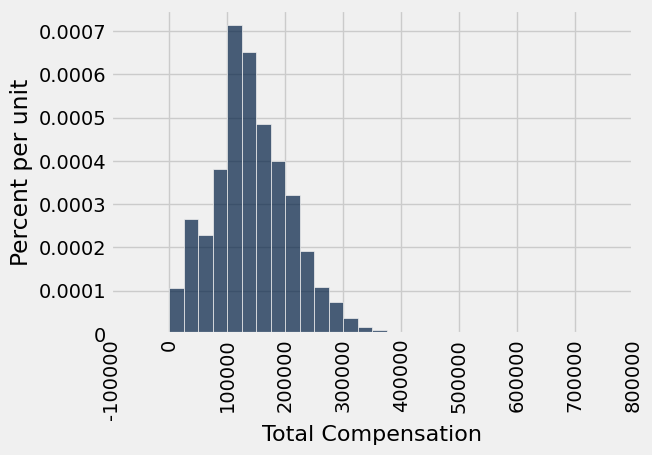

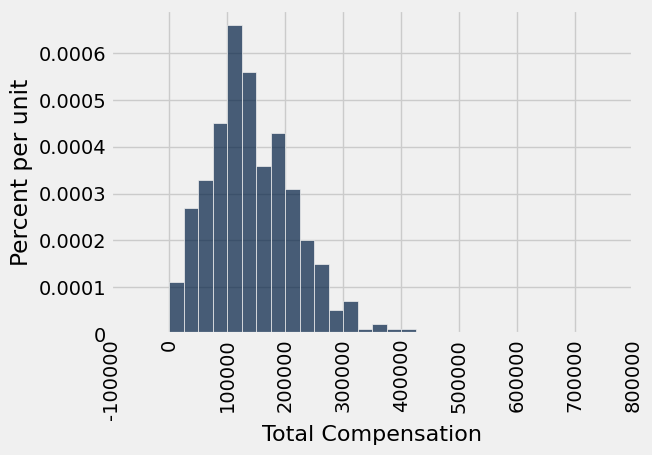

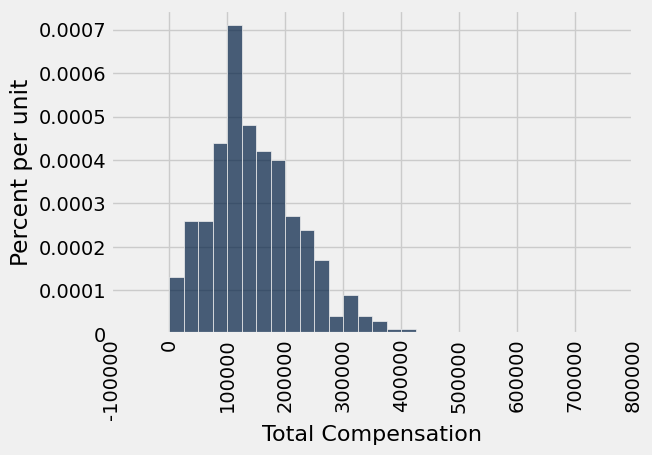

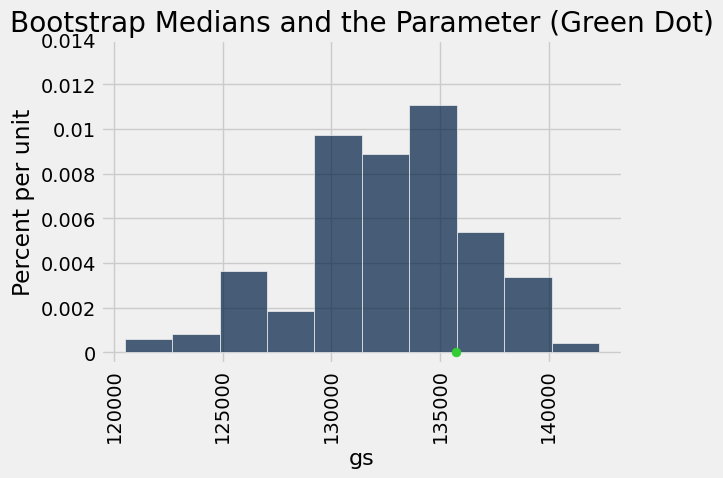

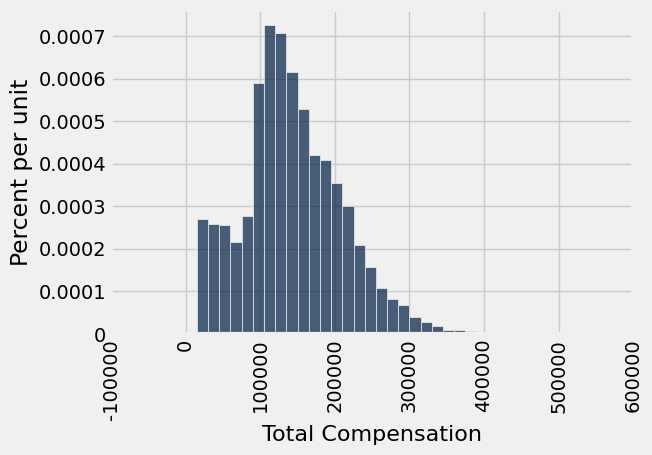

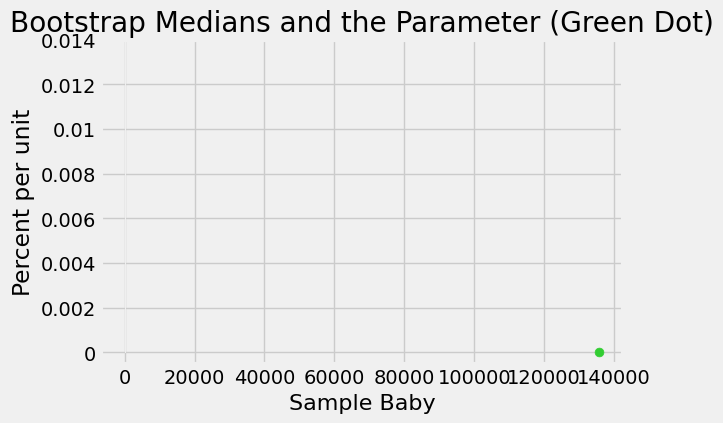

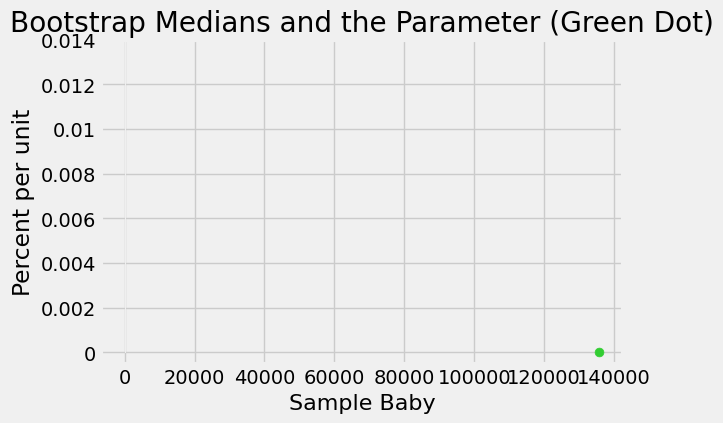

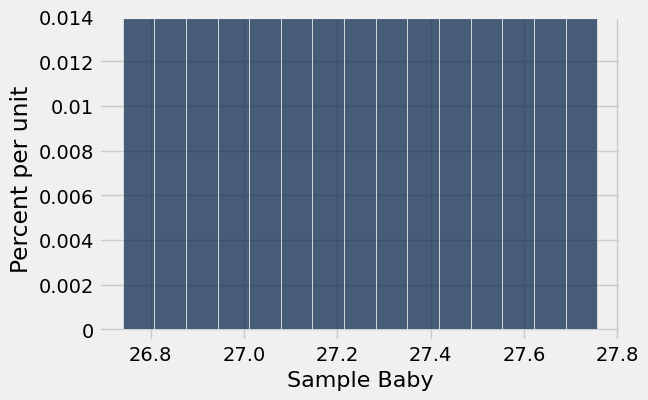

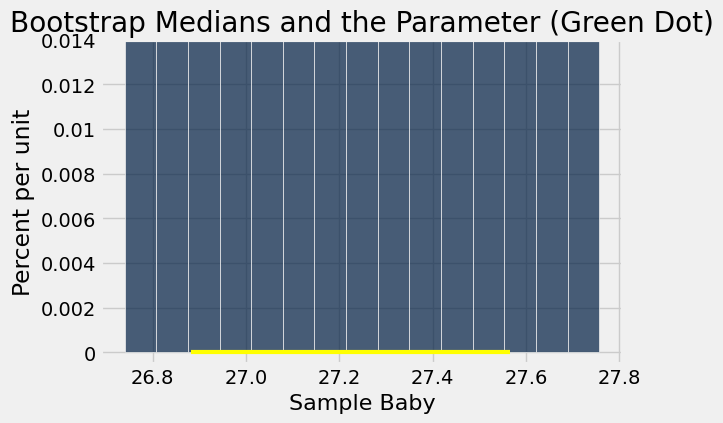

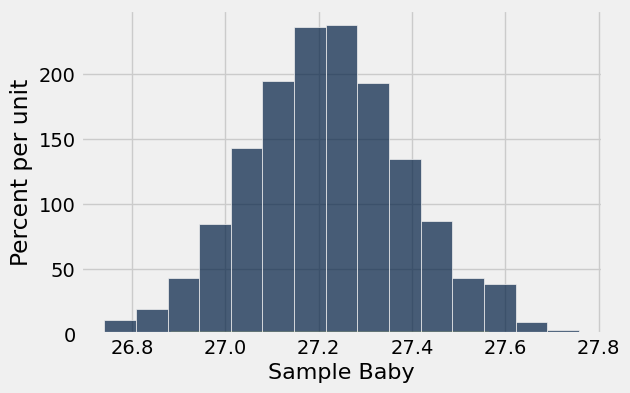

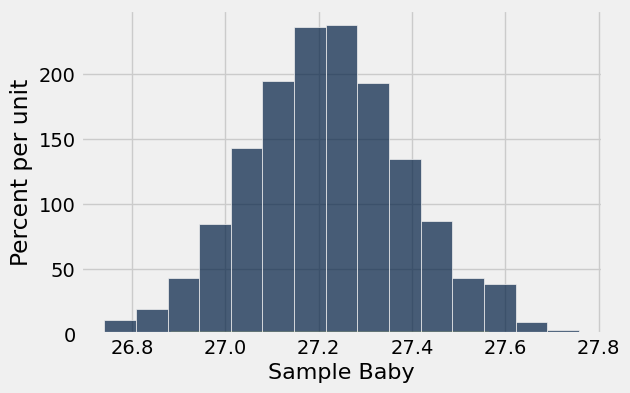

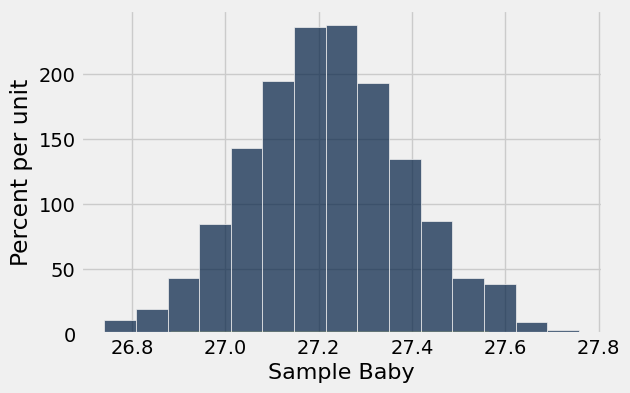

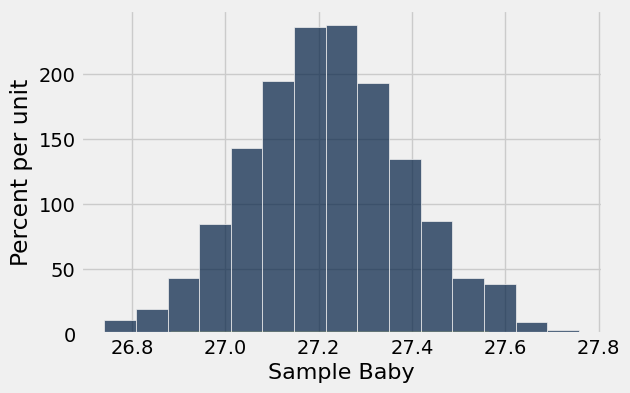

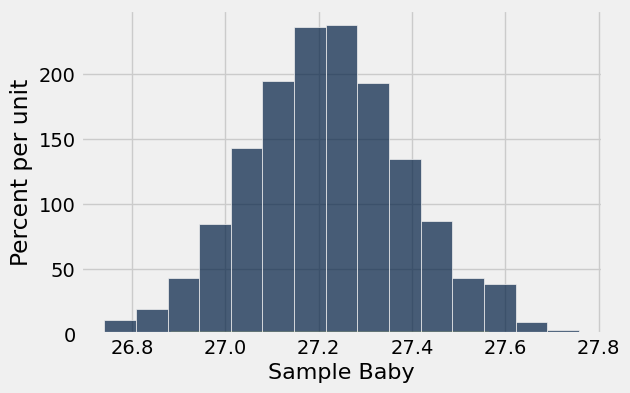

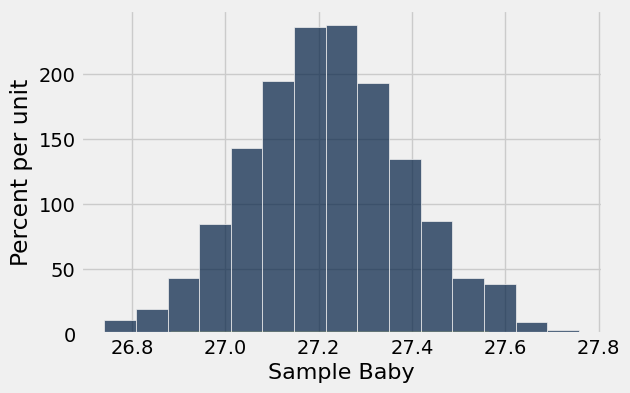

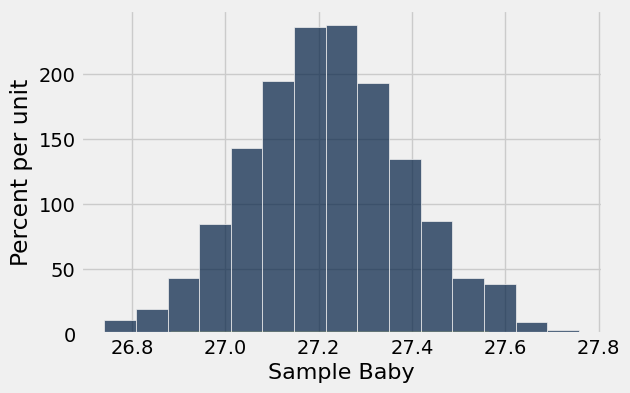

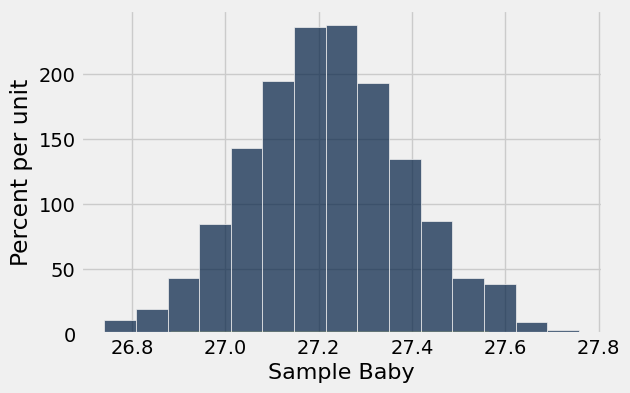

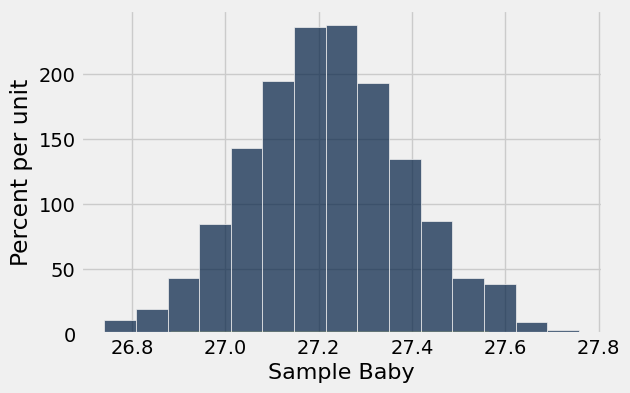

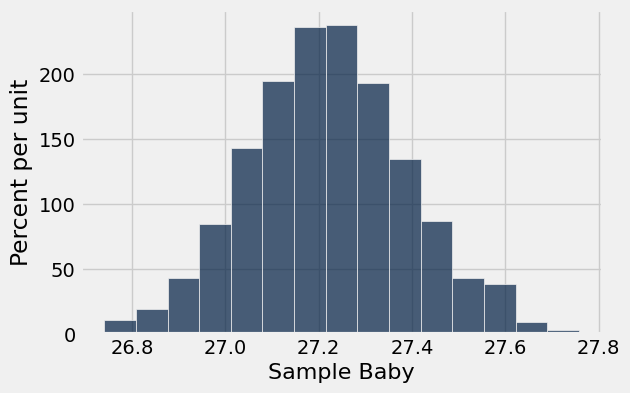

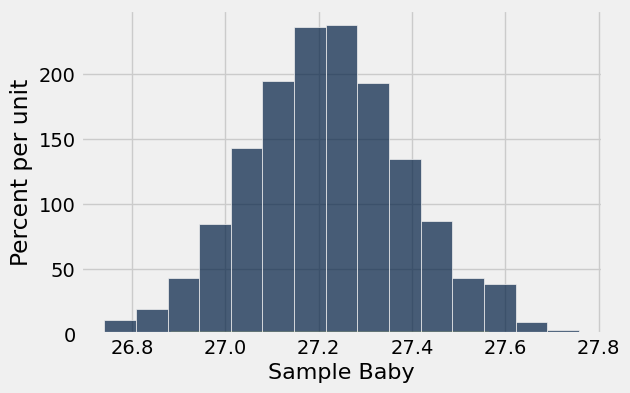

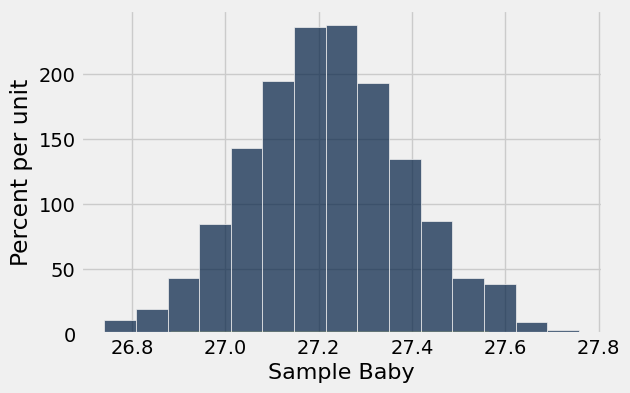

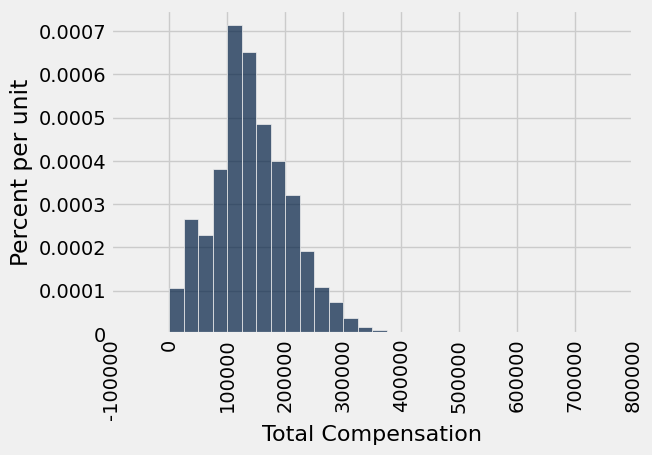

In [69]:
sf.bins = np.arange(0,726000, 25000)
sf.hist("Total Compensation", bins = sf.bins)

In [70]:
#50th percetnaile value of hte dataset stored in the column
pop_median = percentiles(sf.column("Total Compensation"), 50)
pop_median

135747.0

In [71]:
our_sample = sf.sample(400, with_replacement = False)

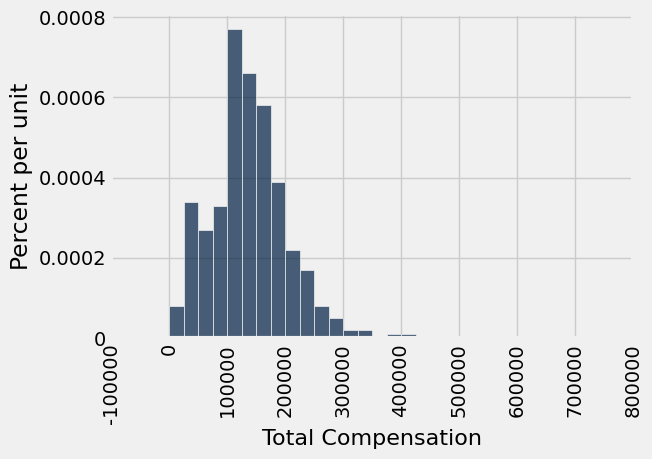

In [72]:
our_sample.hist("Total Compensation", bins = sf.bins)

In [73]:
percentile(50, our_sample.column("Total Compensation"))

132629.0

In [74]:
#BootsStrap

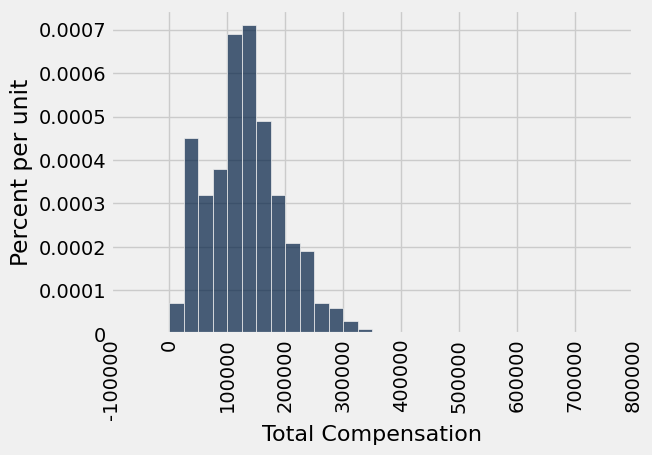

In [75]:
bootsStrap_sample = our_sample.sample()
bootsStrap_sample.hist("Total Compensation", bins = sf.bins)

In [76]:
percentile(50, bootsStrap_sample.column("Total Compensation"))

129906.0

In [77]:
def one_bootsStrap_medium():
    bootsStrap_sample_function = our_sample.sample()
    return percentile(50,bootsStrap_sample_function.column("Total Compensation"))
one_bootsStrap_medium()

131310.0

Text(0.5, 1.0, 'Bootstrap Medians and the Parameter (Green Dot)')

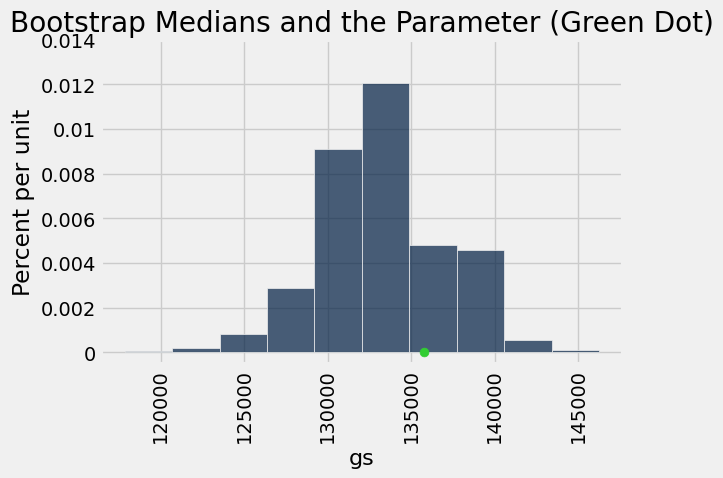

In [78]:
show = make_array()
for i in np.arange(1000):
    show = np.append(show, one_bootsStrap_medium())
resampled_medians = Table().with_column('gs', show)
resampled_medians.hist()
parameter_green='#32CD32'
plots.ylim(-0.000005,0.00014)
plots.scatter(pop_median,0,color=parameter_green,s=40,zorder=2)
plots.title('Bootstrap Medians and the Parameter (Green Dot)')

This represents the medium Total Compensation: 135578.0


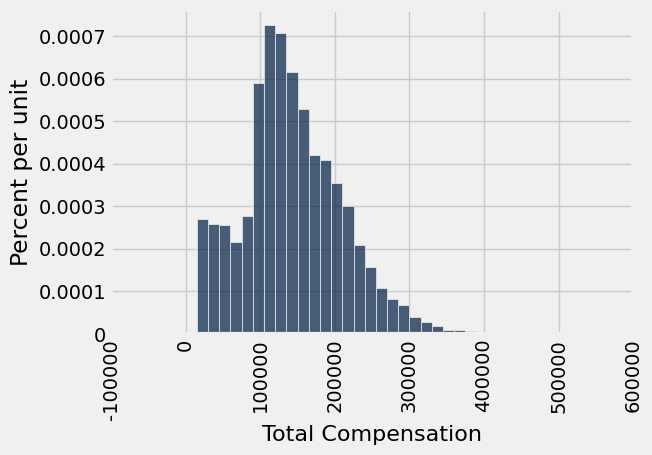

In [79]:
#NOTHING IMPORTANT HERE
second = sf.sample(len(sf.column("Total Compensation")), with_replacement = False) 
second.bins = np.arange(0, 500000, 15000)
second.hist("Total Compensation", bins = second.bins)
third_sample_based_of_second = second.sample()

print("This represents the medium Total Compensation: " + str(percentiles(third_sample_based_of_second.column("Total Compensation"), 50)))

def second_bootsStrap_medium():
    bootsStrap_sample_function = second.sample()
    return percentiles(bootsStrap_sample_function.column("Total Compensation"), 50)



In [81]:
left = percentile(2.5, show)
right = percentile(97.5, show)
make_array(left,right)

array([ 126175.,  140524.])

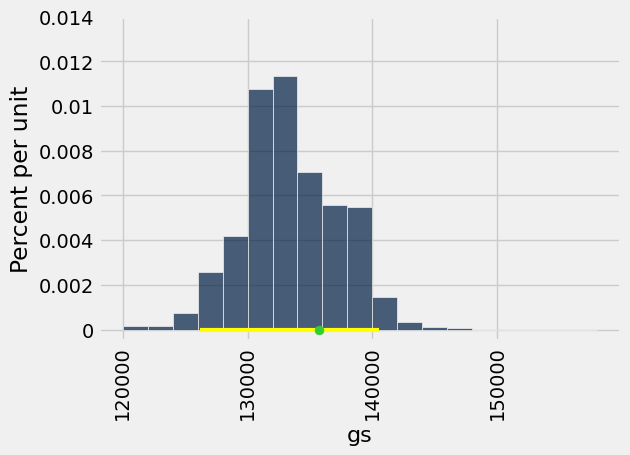

In [84]:
median_bins = np.arange(120000,160000,2000)
resampled_medians.hist(bins=median_bins)
plots.ylim(-0.000005,0.00014)
plots.plot(make_array(left,right),make_array(0,0),color='yellow',lw=3,zorder=1)
plots.scatter(pop_median,0,color=parameter_green,s=40,zorder=2)


In [85]:
#Bootstrap Estimates of the parameter(pretentd it is unknown)
def median_comp(t):
    return percentile(50, t.column("Total Compensation"))
median_comp(sf)


135747.0

In [86]:
'''def confidence_interval_95(sample_size):
    #collect one random sample
    num_repeatitions=1000
    bstrap_medians=make_array()
    for i in np.arange(num_repeatitions):
        our_sample = sf.sample(sample_size, with_replacement = False)
        bstrap_medians=np.append(bstrap_medians,median_comp(our_sample))
    left = percentile(2.5, bstrap_medians)
    right = percentile(97.5, bstrap_medians)
    return make_array(left,right)
print(confidence_interval_95(1000))
'''

def confidence_interval_95(sample_size):
    our_sample=sf.sample(sample_size,with_replacement=False)
    median_comp(our_sample)

    num_repetitions=1000
    bstrap_medians = make_array()
    for i in np.arange(num_repetitions):
        bstrap_medians=np.append(bstrap_medians,median_comp(our_sample.sample()))

    left = percentile(2.5,bstrap_medians)
    right=percentile(97.5,bstrap_medians)
    return make_array(left,right)

confidence_interval_95(100)

array([ 121077.,  153727.])

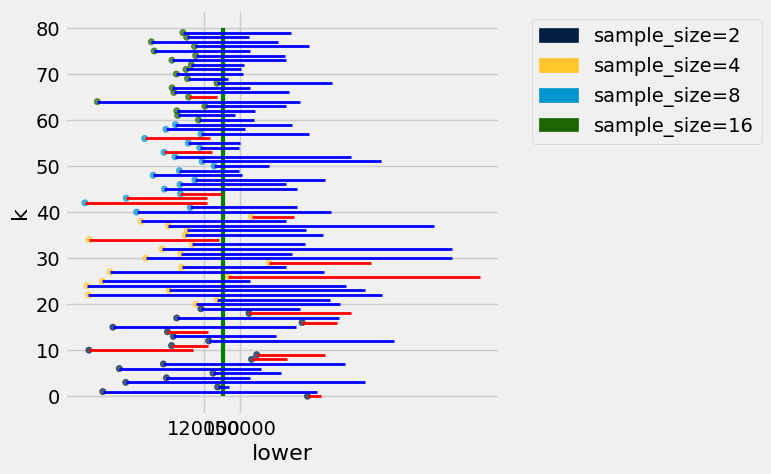

In [87]:

intervals=Table(['k','lower','upper','sample_size'])

for n in [2,4,8,16]:
    for k in np.arange(intervals.num_rows,intervals.num_rows+20):
        interval = confidence_interval_95(n)
        intervals=intervals.with_row([
            k,interval.item(0),interval.item(1),n
        ])
        
intervals.scatter('lower', 'k', group='sample_size')
truth = median_comp(sf)
plots.plot((truth, truth), (0, intervals.num_rows), color='green', lw=3)
plots.xticks([120000, 150000])
for row in intervals.rows:
    if row.item('lower') > truth or row.item('upper') < truth:
        color = 'red'
    else:
        color = 'blue'
    plots.plot((row.item('lower'), row.item('upper')),
               (row.item('k'), row.item('k')),
               color, lw=2)

In [88]:
births = Table().read_table(".csv/baby.csv")
np.average(births.column("Maternal Age"))

27.228279386712096

In [89]:
def one_birth_mean():
    resample = births.sample()
    return np.average(resample.column("Maternal Age"))
print(one_bootstrap_mean())

26.9463373083


In [90]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [91]:
num_rep = 10000
babystrap = make_array()
for i in np.arange(1000):
    babystrap = np.append(babystrap, one_birth_mean())
babystrap

array([ 27.36882453,  27.16269165,  27.02129472,  27.45229983,
        26.89608177,  27.39011925,  27.20528109,  27.31005111,
        27.28534923,  27.18313458,  27.2044293 ,  27.18228279,
        27.14139693,  27.35264055,  27.01618399,  27.21465077,
        27.61413969,  27.09710392,  27.22061329,  27.05110733,
        27.51107325,  27.43441227,  27.60732538,  27.14735945,
        27.14735945,  27.18824532,  27.3637138 ,  26.91567291,
        27.30579216,  27.03662692,  27.19761499,  27.33475298,
        27.15843271,  27.38415673,  27.17035775,  27.25468484,
        27.06899489,  26.9241908 ,  27.15843271,  27.06643952,
        27.35434412,  27.19505963,  27.41311755,  27.25298126,
        27.19165247,  27.31175468,  27.39352641,  27.35519591,
        27.25212947,  27.1439523 ,  27.22061329,  27.03407155,
        27.39608177,  27.27512777,  26.94122658,  27.19505963,
        27.11584327,  27.06984668,  27.1439523 ,  27.0528109 ,
        27.18228279,  27.33560477,  27.20868825,  27.23

In [92]:
#Bootstrap Percntile Mehod for confidence interval

In [93]:
left = percentile(2.5, babystrap)
right = percentile(97.5, babystrap)
make_array(left, right)

array([ 26.90034072,  27.58177172])

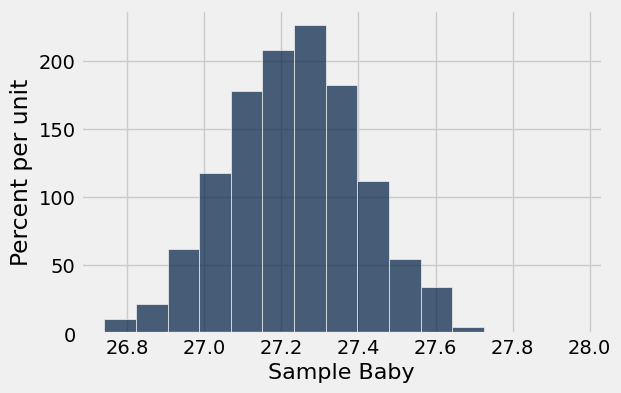

In [94]:
resampled_medians = Table().with_column('Sample Baby', babystrap)
resampled_medians
resampled_medians.hist(bins = 15)
plots.plot([left, right],[0,0], color='yellow', lw = 3)